In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [6]:
#paths
root = '.'
data_folder = f'{root}/data/'
feature_data_folder = f'{root}/feature_data/'

In [40]:
train_hog = np.load(feature_data_folder + 'hog+/train_hog.npy')
train_resnet = np.load(feature_data_folder + 'resnet50/train-fmaps.npy')
train_glcm = np.load(feature_data_folder + 'glcm_scaled/train_glcm.npy')
train_SIFT = np.load(feature_data_folder + 'sift/train_sift.npy')
# train_wavelet = np.load(feature_data_folder + 'wavelet/train_images_wavelet.npy')
train_edges = np.load(feature_data_folder + 'edges/train_images_canny_edges.npy')
train_labels = np.load(feature_data_folder +'resnet50/train-labels.npy')

In [33]:
#scale everything
all_features = [train_hog, train_resnet, train_glcm, train_SIFT, train_edges]
for i in range(len(all_features)):
    scaler = StandardScaler()
    all_features[i] = scaler.fit_transform(all_features[i])

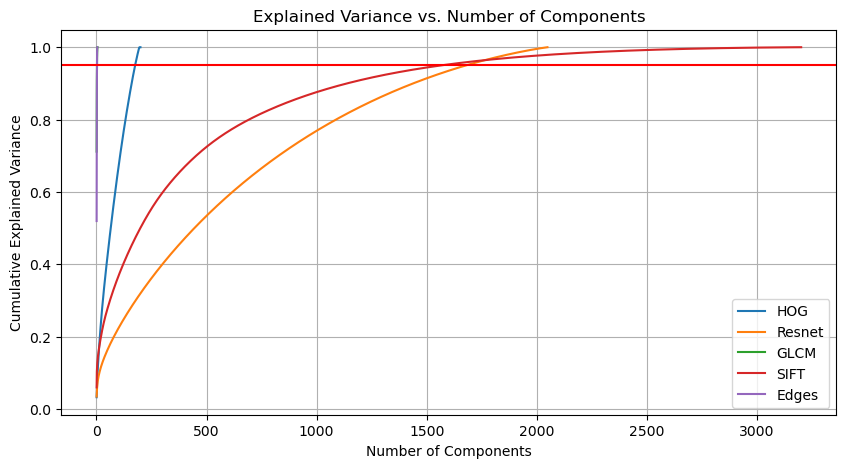

In [36]:
#PCA figure
plt.figure(figsize=(10, 5))
for i in range(len(all_features)):
    pca = PCA()
    pca.fit(all_features[i])
    explained_variance = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(range(1, len(explained_variance) + 1), explained_variance, linestyle='solid')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.legend(['HOG','Resnet','GLCM','SIFT','Edges'])
plt.grid(True)
plt.show()

In [30]:
np.isnan(train_edges).any()

False

# T-SNE subplots

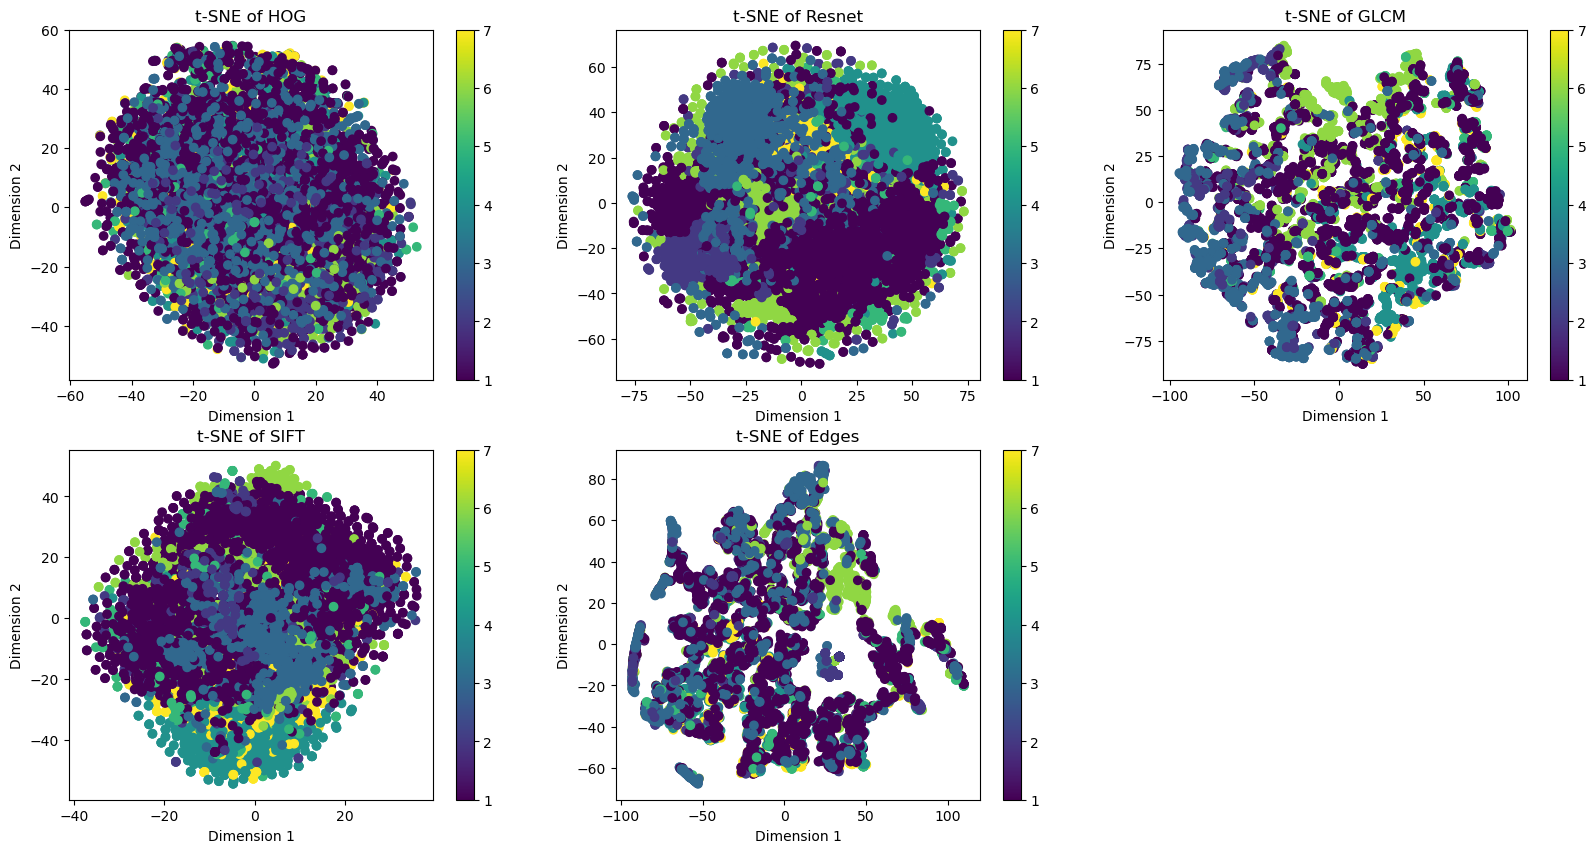

In [45]:
titles = ['t-SNE of HOG', 't-SNE of Resnet','t-SNE of GLCM', 't-SNE of SIFT','t-SNE of Edges']
plt.figure(figsize=(20, 10))
for i in range(len(all_features)):
    tsne = TSNE(n_components = 2)
    reduced_data = tsne.fit_transform(all_features[i])
    plt.subplot(2,3, i+1)
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=train_labels, cmap='viridis', marker='o')
    plt.title(titles[i])
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.colorbar()
plt.show()

In [ ]:
tsne = TSNE(n_components=2)
reduced_data = tsne.fit_transform(X_scaled)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=train_labels, cmap='viridis', marker='o')
plt.title('t-SNE of GLCM Features')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar()
plt.savefig(feature_data_folder + '/glcm_tsne.png')
plt.show()